# Analysis

Train the various algorithms and show your results. 

You must plot the reward obtained by your agent per step and the total regret accumulated so far.

This one is an open ended assignment, so feel free to play around. Extra credit for more beautiful plots (you can check out Seaborn). 

In [10]:
import numpy as numpy
import matplotlib.pyplot as plt 
# import seaborn as sns
# import sys
# import os
# module_path = os.path.abspath(os.path.join('.'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

from bandits import Bandit
from agents import *

In [11]:
numiters = 800
arms = 15

steps = np.arange(numiters)
regrets = np.zeros((arms, numiters))

Greedy = GreedyAgent(Bandit(arms, "Gaussian"), np.zeros(arms))
EpsGreedy = epsGreedyAgent(Bandit(arms, "Gaussian"), 0.1, np.zeros(arms))
UCBA = UCBAAgent(Bandit(arms, "Gaussian"),np.zeros(arms), 0.1)
Grad = GradientBanditAgent(Bandit(arms, "Gaussian"), 0.1, np.zeros(arms))
Thomp = ThompsonSamplerAgent(Bandit(arms, "Bernoulli"))

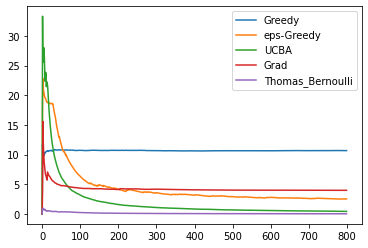

In [12]:
bandits = [Greedy, EpsGreedy, UCBA, Grad, Thomp]
labels = ["Greedy", "eps-Greedy", "UCBA", "Grad", "Thomas_Bernoulli"]

steps = np.arange(numiters)
regrets = np.zeros((arms, numiters))

for i in range(1,numiters) : 
    for bandit in range(5) : 
        reward = bandits[bandit].act()
        regrets[bandit][i] = bandits[bandit].bandit.get_regret()/i

for i in range(5) : 
    plt.plot(steps, regrets[i][:], label = labels[i])

plt.legend()
plt.show()